<a href="https://colab.research.google.com/github/AdhAyush/PRODIGY_DS_04/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  #reduce the word into its root word

from sklearn.feature_extraction.text import TfidfVectorizer  # convert textual data to numerical data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [12]:
import nltk

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# printing stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stopwords: words which don't add influential meaning to the words. So, they can be avoided during training

# Data Processing

In [15]:
#loading the data
twitter_data = pd.read_csv('/content/twitter_training.csv')
twitter_validation_data = pd.read_csv('/content/twitter_validation.csv')

In [16]:
twitter_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
twitter_validation_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [18]:
twitter_data.columns = ['id','information' , 'type' , 'text']
twitter_validation_data.columns = ['id','information' , 'type' , 'text']

In [19]:
twitter_data.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [20]:
twitter_validation_data.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


#Check missing values

In [21]:
twitter_data.isna().sum()

id               0
information      0
type             0
text           686
dtype: int64

In [22]:
twitter_validation_data.isna().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [23]:
twitter_data.shape

(74681, 4)

Out of 74681 data, only 686 have missing values. So, dropping them won't affect the model noticeably.

In [24]:
twitter_data.dropna(subset = ['text'] , inplace = True)

In [25]:
twitter_data.isnull().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [26]:
display(twitter_data.info())
display(twitter_validation_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73995 non-null  int64 
 1   information  73995 non-null  object
 2   type         73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           999 non-null    int64 
 1   information  999 non-null    object
 2   type         999 non-null    object
 3   text         999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


None

# Visualizing the data

In [27]:
import seaborn as sns

Text(0.5, 1.0, 'Bar visualization of types of sentiments')

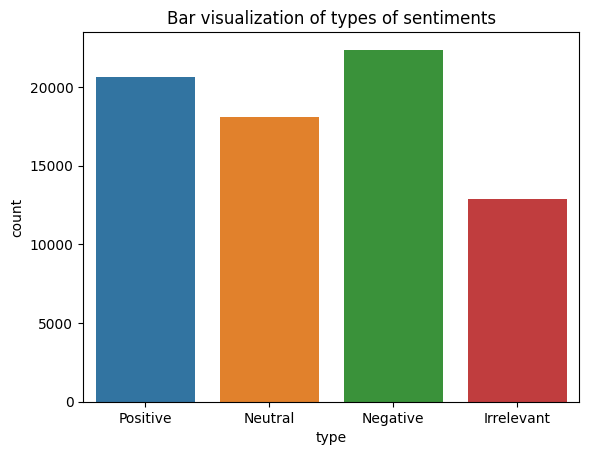

In [28]:
sns.countplot(data = twitter_data, x = 'type')
plt.title('Bar visualization of types of sentiments')

Negative Sentiment data are more in dataset

# Stemming

Stemming : process of reducing a word to its root word

In [29]:
port_stem = PorterStemmer()

In [30]:
def stemming(content):
  stemming_content = re.sub('[^a-zA-Z]' , ' ', content) # filters out only alphabets
  stemming_content = stemming_content.lower() # convert to lower case
  stemming_content = stemming_content.split() # seperates each word

  #if word is present in stopwords ignore it, else convert to its root word
  stemming_content = [port_stem.stem(word) for word in stemming_content if not word in stopwords.words('english')]
  stemming_content = ' '.join(stemming_content)

  return stemming_content


In [31]:
twitter_data['stemmed_text']  = twitter_data['text'].apply(stemming)
twitter_validation_data['stemmed_text']  = twitter_validation_data['text'].apply(stemming)

In [32]:
twitter_data.head()

,id,information,type,text,stemmed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im get borderland murder


In [33]:
twitter_validation_data.head()

,id,information,type,text,stemmed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezo reject claim co...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorli samsungu ch...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmak full closet hack truli aw game
3,4433,Google,Neutral,Now the President is slapping Americans in the...,presid slap american face realli commit unlaw ...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp madelein mccann cellar past year lit...


# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder = LabelEncoder()
twitter_data['type']  = label_encoder.fit_transform(twitter_data['type'])
twitter_validation_data['type'] = label_encoder.transform(twitter_validation_data['type'])


In [36]:
display(twitter_data.head())
display(twitter_validation_data.head())

,id,information,type,text,stemmed_text
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,im get borderland murder


,id,information,type,text,stemmed_text
0,352,Amazon,2,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezo reject claim co...
1,8312,Microsoft,1,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorli samsungu ch...
2,4371,CS-GO,1,"CSGO matchmaking is so full of closet hacking,...",csgo matchmak full closet hack truli aw game
3,4433,Google,2,Now the President is slapping Americans in the...,presid slap american face realli commit unlaw ...
4,6273,FIFA,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp madelein mccann cellar past year lit...


In [37]:
x_train = twitter_data['stemmed_text'].values
y_train = twitter_data['type'].values

x_test = twitter_validation_data['stemmed_text'].values
y_test = twitter_validation_data['type'].values

# Converting textual data to numerical data

In [38]:
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [39]:
print(x_train)

  (0, 10336)	0.49663162064404237
  (0, 2120)	0.7452191874050317
  (0, 3458)	0.4449779726007301
  (1, 2122)	0.4939478500241953
  (1, 7341)	0.37096711722544246
  (1, 9088)	0.5768441076949203
  (1, 10336)	0.5344621547046817
  (2, 12545)	0.6504193104805395
  (2, 2122)	0.4178976839097431
  (2, 9088)	0.4880309056328144
  (2, 3458)	0.4051445192571497
  (3, 12545)	0.6728777093584877
  (3, 2122)	0.4323273183381578
  (3, 7341)	0.3246885657541715
  (3, 9088)	0.5048821776766447
  (4, 12545)	0.6728777093584877
  (4, 2122)	0.4323273183381578
  (4, 7341)	0.3246885657541715
  (4, 9088)	0.5048821776766447
  (5, 9798)	0.250525349119969
  (5, 21164)	0.2897437943214111
  (5, 12220)	0.2897437943214111
  (5, 3448)	0.08267660102188175
  (5, 19840)	0.10590095229119609
  (5, 14341)	0.10540140593582704
  :	:
  (73992, 15566)	0.30881045097495385
  (73992, 21910)	0.2038319715608453
  (73993, 13997)	0.42400437836390864
  (73993, 13240)	0.20201986741574043
  (73993, 5128)	0.28766048906512637
  (73993, 21313)	0.2717

In [40]:
print(x_test)

  (0, 20008)	0.17100071200389802
  (0, 15761)	0.24653019130497567
  (0, 12869)	0.301472082980969
  (0, 10952)	0.10853854562287144
  (0, 9738)	0.22979485311431502
  (0, 5143)	0.22037652790950427
  (0, 4347)	0.2905189994732742
  (0, 3501)	0.15948368572924587
  (0, 3337)	0.12610413685331917
  (0, 3201)	0.19792442397033558
  (0, 2478)	0.3022814266112261
  (0, 2139)	0.2198076917473286
  (0, 1700)	0.24653019130497567
  (0, 1488)	0.4672236914501354
  (0, 1146)	0.25030299546121904
  (0, 534)	0.13498944291373227
  (0, 146)	0.20345294161886643
  (1, 21449)	0.3088358980272279
  (1, 16586)	0.5074303965606591
  (1, 14627)	0.39819493856408805
  (1, 14074)	0.27975749172277514
  (1, 12021)	0.22545466021143595
  (1, 6998)	0.3825117278036368
  (1, 3127)	0.4616993521162378
  (2, 19691)	0.3428511527395446
  :	:
  (996, 14455)	0.1666116821051336
  (996, 8211)	0.2574544368368736
  (996, 5121)	0.4073893205502751
  (996, 4290)	0.21641102199757187
  (996, 3458)	0.22778395237867233
  (996, 2122)	0.2349541499546

## Train the Model using XGBoost

In [42]:
import xgboost as xgb

In [43]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
y_pred = xgb_classifier.predict(x_test)

In [81]:
y_pred

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3,
       1, 2, 2, 1, 1, 0, 3, 3, 3, 1, 3, 1, 3, 2, 3, 3, 2, 3, 0, 2, 2, 3,
       2, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 2, 1, 3, 1, 3, 3, 0, 1, 2, 1,
       2, 3, 1, 3, 1, 1, 3, 3, 0, 1, 3, 2, 2, 2, 3, 3, 2, 1, 2, 1, 0, 3,
       2, 2, 2, 3, 1, 0, 1, 1, 1, 0, 3, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 2,
       3, 1, 2, 1, 0, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1, 3, 2,
       3, 3, 0, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 3, 1, 3, 0, 3, 1, 1, 2, 2,
       3, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 0,
       2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 0, 0, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1,
       3, 2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 3, 1, 1, 3, 3, 2, 1, 3, 1, 1,
       1, 2, 3, 2, 3, 0, 2, 3, 1, 3, 0, 1, 3, 0, 2, 1, 2, 3, 1, 1, 0, 3,
       3, 0, 0, 2, 3, 1, 1, 3, 3, 2, 3, 2, 2, 2, 1, 2, 3, 2, 1, 2, 1, 1,
       3, 3, 0, 1, 2, 2, 3, 2, 3, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3, 2,
       2, 1, 3, 1, 3, 2, 3, 2, 2, 3, 1, 2, 1, 0, 1,

In [46]:
accuracy = accuracy_score(y_pred, y_test)

In [55]:
print(f"XGBoost accuracy: {accuracy : .2f}")

XGBoost accuracy:  0.76


In [56]:
print("XGBoost Classification Report: ")
print(classification_report(y_test, y_pred))

XGBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       171
           1       0.67      0.90      0.77       266
           2       0.79      0.71      0.74       285
           3       0.78      0.78      0.78       277

    accuracy                           0.76       999
   macro avg       0.78      0.74      0.75       999
weighted avg       0.77      0.76      0.75       999



In [57]:
print('XGBoost Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

XGBoost Confusion Matrix: 
[[ 99  28  15  29]
 [  1 239  16  10]
 [  7  56 201  21]
 [  3  34  24 216]]


# Demo

In [71]:
input = twitter_data.loc[55,'text']
output = twitter_data.loc[55 , 'type']

Let's give that text as input to model

In [82]:
print(f"Input text: \n{input}")
print(f"Label: {label_encoder.inverse_transform([output])}")

Input text: 
Why, like everyone else in the border countries, have your hair fallen off, have you not heard that you are stupid aliens?
Label: ['Negative']


In [73]:
stemmed_input = stemming(input)

In [74]:
vectorized_input = vectorizer.transform([stemmed_input])

In [75]:
prediction_input = xgb_classifier.predict(vectorized_input)
prediction_input

array([1])

In [77]:
print(f'Actual type: {label_encoder.inverse_transform([output])}')
print(f'Predicted type: {label_encoder.inverse_transform(prediction_input)}')

Actual type: ['Negative']
Predicted type: ['Negative']
